In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
N = 20 
X = np.random.random(N) * 10 - 5  #(-5,5)
Y = 0.5 * X -1 + np.random.randn(N) # with gaussian error

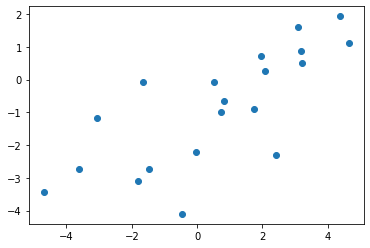

In [ ]:
plt.scatter(X,Y);

# Linear Regression Model

In [ ]:
# 1. Build the Model
model = nn.Linear(1,1)

In [ ]:
# 2. Train the Model
# 2.1 Define Optimizer & Loss Function
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)

In [ ]:
# 2.2 Preprocessing Data
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
# Convert From Numpy Arrays to Pytorch Tensors
inputs = torch.from_numpy(X.astype('float32')) #PYTORCH uses float32 by default
targets = torch.from_numpy(Y.astype('float32'))#NUMPY uses float64 by default

In [ ]:
# 2.2 Training process
losses = []
n_epochs = 30 
for it in range(n_epochs):
  #Sets all gradients to Zero
  #It prevents the accumulation of gradients made in backward()
  model.zero_grad()

  #Forward Pass
  outputs = model(inputs) #get the predictions
  loss = criterion(outputs,targets)
  losses.append(loss.item()) #extract loss (Scalar Tensor)

  #Backward and Optimize
  loss.backward() #get the gradients
  optimizer.step()#optimze with a gradient step
  print(f'Epoch {it + 1} / {n_epochs}, Loss: {loss.item():0.4}')

Epoch 1 / 30, Loss: 3.211
Epoch 2 / 30, Loss: 2.003
Epoch 3 / 30, Loss: 1.666
Epoch 4 / 30, Loss: 1.529
Epoch 5 / 30, Loss: 1.455
Epoch 6 / 30, Loss: 1.409
Epoch 7 / 30, Loss: 1.379
Epoch 8 / 30, Loss: 1.36
Epoch 9 / 30, Loss: 1.347
Epoch 10 / 30, Loss: 1.338
Epoch 11 / 30, Loss: 1.333
Epoch 12 / 30, Loss: 1.329
Epoch 13 / 30, Loss: 1.327
Epoch 14 / 30, Loss: 1.325
Epoch 15 / 30, Loss: 1.324
Epoch 16 / 30, Loss: 1.323
Epoch 17 / 30, Loss: 1.323
Epoch 18 / 30, Loss: 1.323
Epoch 19 / 30, Loss: 1.322
Epoch 20 / 30, Loss: 1.322
Epoch 21 / 30, Loss: 1.322
Epoch 22 / 30, Loss: 1.322
Epoch 23 / 30, Loss: 1.322
Epoch 24 / 30, Loss: 1.322
Epoch 25 / 30, Loss: 1.322
Epoch 26 / 30, Loss: 1.322
Epoch 27 / 30, Loss: 1.322
Epoch 28 / 30, Loss: 1.322
Epoch 29 / 30, Loss: 1.322
Epoch 30 / 30, Loss: 1.322


In [ ]:
# 3. Predictions
# detach the numpy array from all the info model tracks
predictions = model(inputs).detach().numpy() 

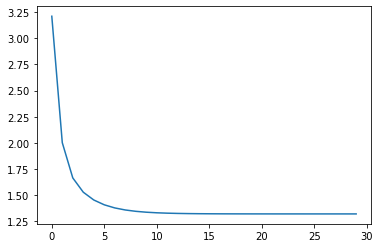

In [ ]:
plt.plot(losses);

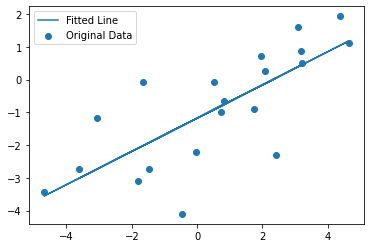

In [ ]:
# Plot the graph
plt.scatter(X,Y,label = 'Original Data')
plt.plot(X,predictions, label = 'Fitted Line')
plt.legend()
plt.show();

In [ ]:
# Weights
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.50780517]] [-1.1770841]
